# Pymaceuticals Inc.
---

### Analysis

- The weight of a mouse and the size of the tumor are in positive correlation.
- Stesalyn and Propriva were used with 24 mice and all the rest were used with 25 mice.
- Only Infubinol had an outlier.
- Capomulin had a smaller variance in final tumor volume in relation to the other three drugs.
- Ceftamin had a larger variance in final tumor volume in relation to the other three drugs.
- Female and male test subjects were almost equally distributed. 
- Capomulin has the maximum mice number (230), and Zoniferol has the smaller (182). 
- After removing duplicates the total number of mice is 248. Mice by gender show 124 female mice and 125 male mice.- 
- The R-squared value of the regression analysis between average tumor volume and weight of mice is 0.70.
- The treatments that show the most reduction of tumor size are Capomulin and Ramicane.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_df= pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [3]:
# Checking the number of mice.
num_mice=complete_df['Mouse ID'].nunique()
num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice_ID = complete_df.loc[complete_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = complete_df.loc[complete_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_df[complete_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean=clean_df['Mouse ID'].nunique()
num_mice_clean

248

In [9]:
# Drop duplicate rows based on 'mice_id'
unique_mice_df = clean_df.drop_duplicates(subset=['Mouse ID'])

# Count the occurrences of each drug regimen after dropping duplicates
drug_counts = unique_mice_df['Drug Regimen'].value_counts()

# Print the resulting Series
print(drug_counts)

Drug Regimen
Infubinol    25
Placebo      25
Ceftamin     25
Zoniferol    25
Ramicane     25
Ketapril     25
Naftisol     25
Capomulin    25
Stelasyn     24
Propriva     24
Name: count, dtype: int64


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stat 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

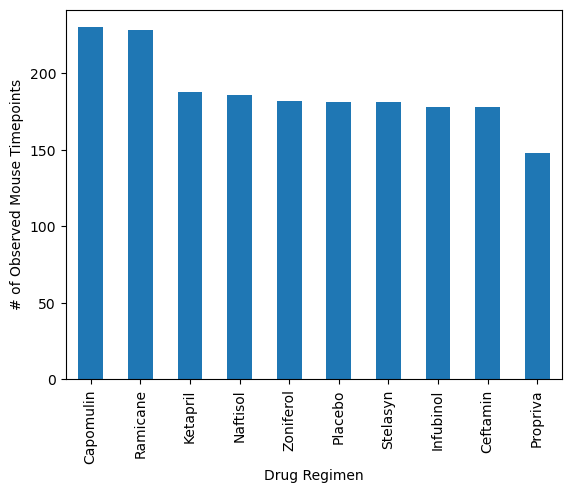

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_regimen=clean_df['Drug Regimen'].value_counts()
plot_pandas = mice_regimen.plot.bar()
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')


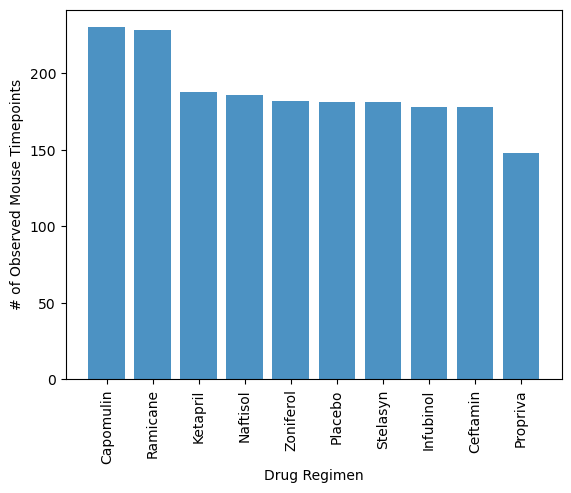

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_regimen.index.values
y_axis = mice_regimen.values

plt.bar(x_axis, y_axis, alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

Sex
Male      958
Female    922
Name: count, dtype: int64


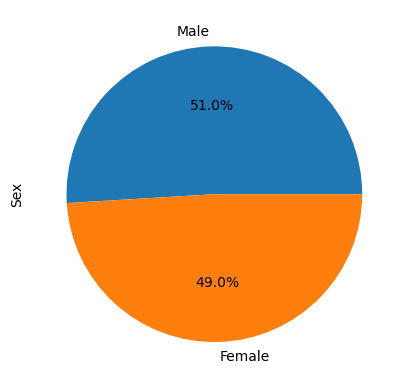

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
print(gender_data)
gender_data.plot.pie(autopct= "%1.1f%%")
plt.ylabel('Sex')
plt.show()

([<matplotlib.patches.Wedge at 0x250f40e83e0>,
 [Text(-0.006926817490305698, 1.0999781903289974, 'Male'),
  Text(0.006927023465086935, -1.0999781890319074, 'Female')],
 [Text(-0.0037782640856212895, 0.5999881038158167, '50.2%'),
  Text(0.0037783764355019643, -0.599988103108313, '49.8%')])

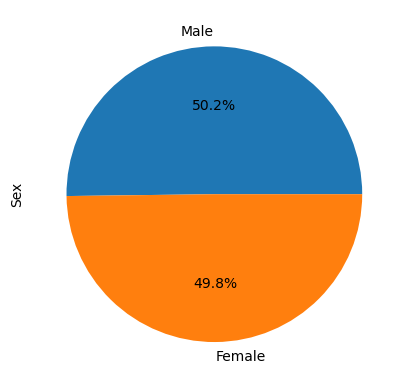

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female',]
sizes = [50.200803, 49.7999197]
plt.ylabel('Sex')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

mouse_ids = clean_df["Mouse ID"].unique()
max_times = []

for mouse in mouse_ids:
    max_timepoint_index = clean_df.loc[clean_df["Mouse ID"] == mouse, "Timepoint"].idxmax()
    max_times.append(clean_df.loc[max_timepoint_index, ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]])

max_times = pd.DataFrame(max_times)
max_times.rename(columns={"Tumor Volume (mm3)": "Final Tumor Vol"}, inplace=True)

print(max_times)


     Mouse ID Drug Regimen  Final Tumor Vol
9        a203    Infubinol        67.973419
19       a251    Infubinol        65.525743
29       a262      Placebo        70.717621
39       a275     Ceftamin        62.999356
46       a366     Stelasyn        63.440686
...       ...          ...              ...
1852     z435     Propriva        48.710661
1862     z578     Ramicane        30.638696
1872     z581    Infubinol        62.754451
1882     z795     Naftisol        65.741070
1892     z969     Naftisol        73.867845

[248 rows x 3 columns]


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_drug = max_times.loc[max_times["Drug Regimen"]==drug,:]
    quartiles = max_drug["Final Tumor Vol"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower quartile of Final Tumor Vol for {drug} is: {lowerq}")
    print(f"The upper quartile of Final Tumor Vol for {drug} is: {upperq}")
    print(f"The interquartile range of Final Tumor Vol for {drug} is: {iqr}")
    print(f"The the median of Final Tumor Vol for {drug} is: {quartiles[0.5]} ")
    print(f"\nValues below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    # Determine outliers using upper and lower bounds
    outlier_vol = max_drug.loc[(max_drug['Final Tumor Vol'] < 
        lower_bound) | (max_drug['Final Tumor Vol'] > upper_bound)]
    if len(outlier_vol) == 0:
        print(f"\n{drug} has no potential outliers\n")
        print("-------------------------------------")
    else:
        print(f"\nPotential outliers for {drug}")
        print(outlier_vol.to_string(index=False))
        print("-------------------------------------")
    # add subset 
    max_drug = max_drug.loc[:,"Final Tumor Vol"]
    final_vol.append(max_drug)





The lower quartile of Final Tumor Vol for Capomulin is: 32.37735684
The upper quartile of Final Tumor Vol for Capomulin is: 40.1592203
The interquartile range of Final Tumor Vol for Capomulin is: 7.781863460000004
The the median of Final Tumor Vol for Capomulin is: 38.1251644 

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Capomulin has no potential outliers

-------------------------------------
The lower quartile of Final Tumor Vol for Ramicane is: 31.56046955
The upper quartile of Final Tumor Vol for Ramicane is: 40.65900627
The interquartile range of Final Tumor Vol for Ramicane is: 9.098536719999998
The the median of Final Tumor Vol for Ramicane is: 36.56165229 

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Ramicane has no potential outliers

-------------------------------------
The lower quartile of Final Tumor Vol for Infubinol is: 54.04860769
The upper quartile of Final Tumor Vo

C:\Users\Karen\AppData\Local\Temp\ipykernel_26004\4120655871.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(regimens)


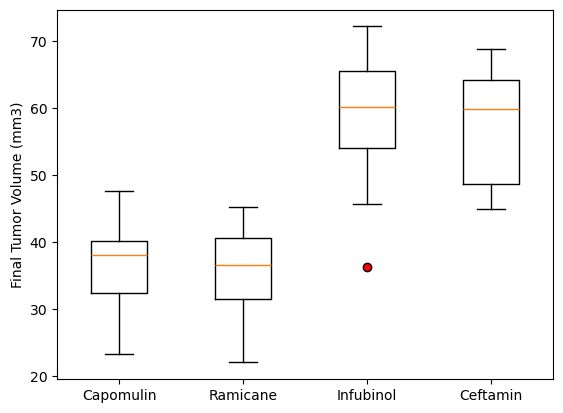

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(regimens)
outlier = dict(markerfacecolor='red')
bp = ax1.boxplot(final_vol, flierprops=outlier)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

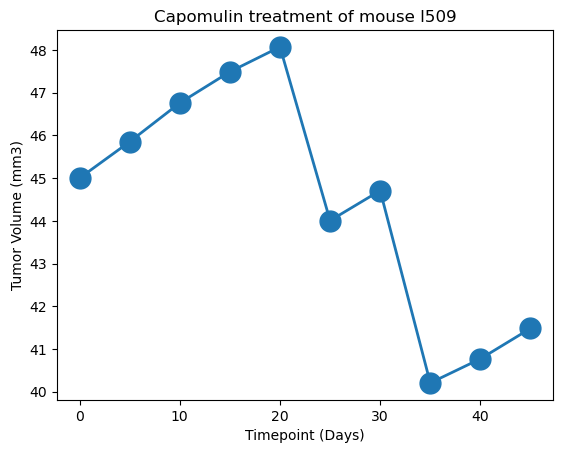

In [64]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

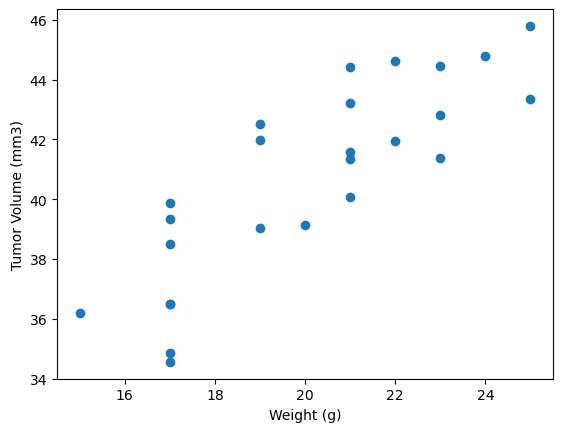

In [69]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})
#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


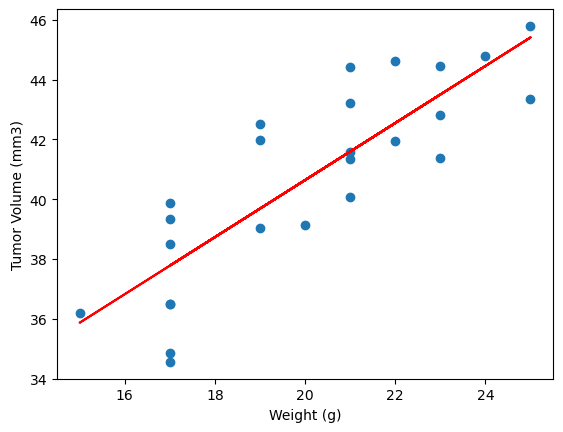

In [70]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=avg_capomulin_df["Weight (g)"]
y_values=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()